<a href="https://colab.research.google.com/github/xin1uzhong28-stack/123/blob/main/DAB_Project_Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load dataset
df = pd.read_csv('WorldSustainabilityDataset.csv')

# Display a part of the dataset
print("Dataset shape:", df.shape)
print("\nDisplaying first 5 rows:")
df.head()

Dataset shape: (3287, 54)

Displaying first 5 rows:


,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,NaN,...,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,NaN,...,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339,Latin America and Caribbean
2,Aruba,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,NaN,...,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972,Latin America and Caribbean
3,Aruba,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,NaN,...,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606,Latin America and Caribbean
4,Aruba,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,NaN,...,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240,Latin America and Caribbean


In [ ]:
# Check column names
print("Column names:")
for col in df.columns:
    print(f"- {col}")

Column names:
- Country Name
- Country Code
- Year
- Access to electricity (% of population) - EG.ELC.ACCS.ZS
- Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG
- Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS
- Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS
- Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS
- Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS
- Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS
- Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5
- Broad money (% of GDP) - FM.LBL.BMNY.GD.ZS
- Children out of school (% of primary school age) - SE.PRM.UNER.ZS
- Compulsory education, duration (years) - SE.COM.DURS
- Cost of business start-up procedures, female (% of GNI per capita) - IC.REG.COST.PC.FE.ZS
- Cost of business start-up procedures, male (% of GNI per capita) - IC.REG.CO

In [ ]:
# Identify key variables

# Our key decision variables are:
# 1. CO2 emissions (dependent variable)
# 2. Income group
# 3. EV readiness indicators (electricity access, GDP, etc.)
# 4. Other

# Set key variables
key_columns = [
    'Country Name', 'Country Code', 'Year',
    'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
    'Income Classification (World Bank Definition)',
    'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
    'GDP per capita (current US$) - NY.GDP.PCAP.CD',
    'Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG',
    'Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS',
    'Renewable electricity output (% of total electricity output) - EG.ELC.RNEW.ZS',
    'Individuals using the Internet (% of population) - IT.NET.USER.ZS'
]

# Check which columns exist in the dataset
available_columns = [col for col in key_columns if col in df.columns]
print("Available key columns:")
for col in available_columns:
    print(f"{col}")

# Checking for other CO2-related columns
co2_columns = [col for col in df.columns if 'CO2' in col or 'carbon' in col.lower()]
print("\nCO2-related columns:")
for col in co2_columns:
    print(f"- {col}")

Available key columns:
Country Name
Country Code
Year
Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes
Income Classification (World Bank Definition)
Access to electricity (% of population) - EG.ELC.ACCS.ZS
GDP per capita (current US$) - NY.GDP.PCAP.CD
Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG
Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS
Renewable electricity output (% of total electricity output) - EG.ELC.RNEW.ZS
Individuals using the Internet (% of population) - IT.NET.USER.ZS

CO2-related columns:
- Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS
- Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes


In [ ]:
# Cleaning the dataset

clean_data = df[[
    'Country Name', 'Country Code', 'Year',
    'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
    'Income Classification (World Bank Definition)',
    'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
    'GDP per capita (current US$) - NY.GDP.PCAP.CD',
    'Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG',
    'Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS',
    'Renewable electricity output (% of total electricity output) - EG.ELC.RNEW.ZS',
    'Individuals using the Internet (% of population) - IT.NET.USER.ZS'
]].copy()

# Renaming columns for simplicity
clean_data.columns = [
    'Country', 'Country_Code', 'Year', 'CO2_Emissions',
    'Income_Classification', 'Electricity_Access', 'GDP_per_capita',
    'Income_Growth', 'Natural_Resources_Rents', 'Renewable_Electricity',
    'Internet_Users'
]

print("Clean dataset shape:", clean_data.shape)
clean_data.head()

Clean dataset shape: (3287, 11)


,Country,Country_Code,Year,CO2_Emissions,Income_Classification,Electricity_Access,GDP_per_capita,Income_Growth,Natural_Resources_Rents,Renewable_Electricity,Internet_Users
0,Aruba,ABW,2000,2.378,High income,91.660398,20617.75047,NaN,NaN,0.0,NaN
1,Aruba,ABW,2001,2.407,High income,100.000000,20670.36701,NaN,0.000712,0.0,17.1
2,Aruba,ABW,2002,2.437,High income,100.000000,20436.88713,NaN,0.000657,0.0,18.8
3,Aruba,ABW,2003,2.561,High income,100.000000,20833.97636,NaN,0.000700,0.0,20.8
4,Aruba,ABW,2004,2.616,High income,100.000000,22568.37499,NaN,0.000685,0.0,23.0


In [ ]:
# Handle missing values and data types

print("Before cleaning -")
print("Missing values in each column:")
print(clean_data.isnull().sum())

print("\nData types:")
print(clean_data.dtypes)

Before cleaning -
Missing values in each column:
Country                      0
Country_Code                 0
Year                         0
CO2_Emissions                2
Income_Classification        2
Electricity_Access          94
GDP_per_capita              41
Income_Growth              721
Natural_Resources_Rents    234
Renewable_Electricity      516
Internet_Users             301
dtype: int64

Data types:
Country                     object
Country_Code                object
Year                         int64
CO2_Emissions              float64
Income_Classification       object
Electricity_Access         float64
GDP_per_capita             float64
Income_Growth              float64
Natural_Resources_Rents    float64
Renewable_Electricity      float64
Internet_Users             float64
dtype: object


In [ ]:
# Data cleaning
# Remove rows where target variable, "CO2 emissions", is missing
clean_data = clean_data.dropna(subset=['CO2_Emissions'])

# For other numeric columns, fill missing values with the median of each country
numeric_columns = ['Electricity_Access', 'GDP_per_capita', 'Income_Growth',
                  'Natural_Resources_Rents', 'Renewable_Electricity', 'Internet_Users']

for col in numeric_columns:
    clean_data[col] = clean_data.groupby('Country')[col].transform(
        lambda x: x.fillna(x.median())
    )

# If still missing, fill with the overall median
for col in numeric_columns:
    clean_data[col] = clean_data[col].fillna(clean_data[col].median())

# Selecting data only for analysis period -- 2002-2018
analysis_data = clean_data[(clean_data['Year'] >= 2002) & (clean_data['Year'] <= 2018)].copy()

print("After cleaning:")
print("Dataset shape:", analysis_data.shape)
print("\nMissing values:")
print(analysis_data.isnull().sum())

print(f"\nYears in dataset: {analysis_data['Year'].min()} - {analysis_data['Year'].max()}")
print(f"Number of countries: {analysis_data['Country'].nunique()}")

After cleaning:
Dataset shape: (2941, 11)

Missing values:
Country                    0
Country_Code               0
Year                       0
CO2_Emissions              0
Income_Classification      0
Electricity_Access         0
GDP_per_capita             0
Income_Growth              0
Natural_Resources_Rents    0
Renewable_Electricity      0
Internet_Users             0
dtype: int64

Years in dataset: 2002 - 2018
Number of countries: 173


Descriptive Analytics

Income Classification Distribution:
Income_Classification
High income            825
Lower-middle income    773
Upper-middle income    705
Low income             638
Name: count, dtype: int64


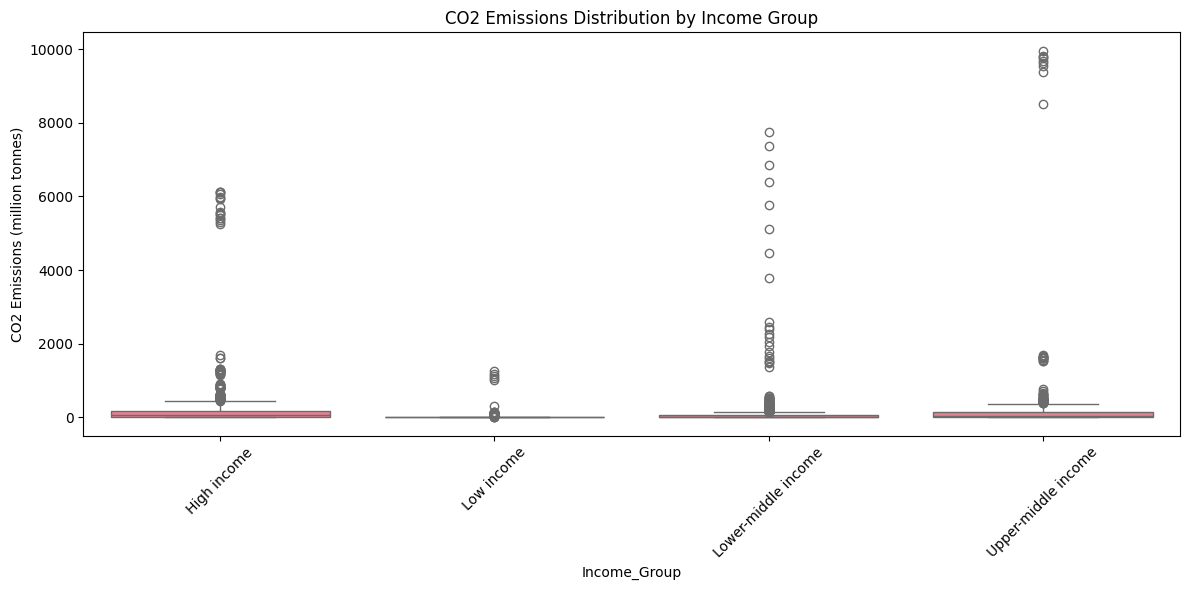

In [ ]:
# Income group distribution
print("Income Classification Distribution:")
print(analysis_data['Income_Classification'].value_counts())

# Create a simplified income classification
analysis_data['Income_Group'] = analysis_data['Income_Classification'].fillna('Not classified')

# 1 - CO2 Emissions by Income Group (Boxplot) - Plot 1
plt.figure(figsize=(12, 6))
sns.boxplot(data=analysis_data, x='Income_Group', y='CO2_Emissions')
plt.title('CO2 Emissions Distribution by Income Group')
plt.xticks(rotation=45)
plt.ylabel('CO2 Emissions (million tonnes)')
plt.tight_layout()
plt.show()


From the above box plot, we find that "High-income" countries generally have higher CO2 emissions, but there is a significant variation within each group.

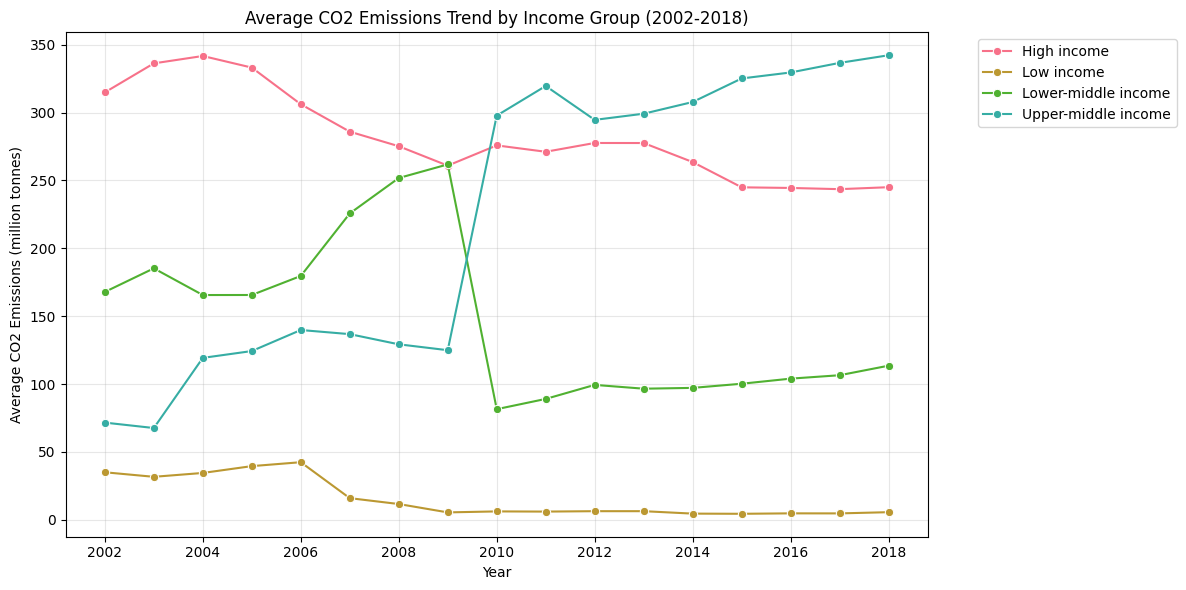

In [ ]:
# 2 - Average CO2 Emissions Trend Over Time by Income Group - Plot 2
plt.figure(figsize=(12, 6))

# Calculate yearly averages (CO2 Emissions) by income group
yearly_avg = analysis_data.groupby(['Year', 'Income_Group'])['CO2_Emissions'].mean().reset_index()

# Plot
sns.lineplot(data=yearly_avg, x='Year', y='CO2_Emissions', hue='Income_Group', marker='o')
plt.title('Average CO2 Emissions Trend by Income Group (2002-2018)')
plt.ylabel('Average CO2 Emissions (million tonnes)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


We find varying emission trends across income groups over time.

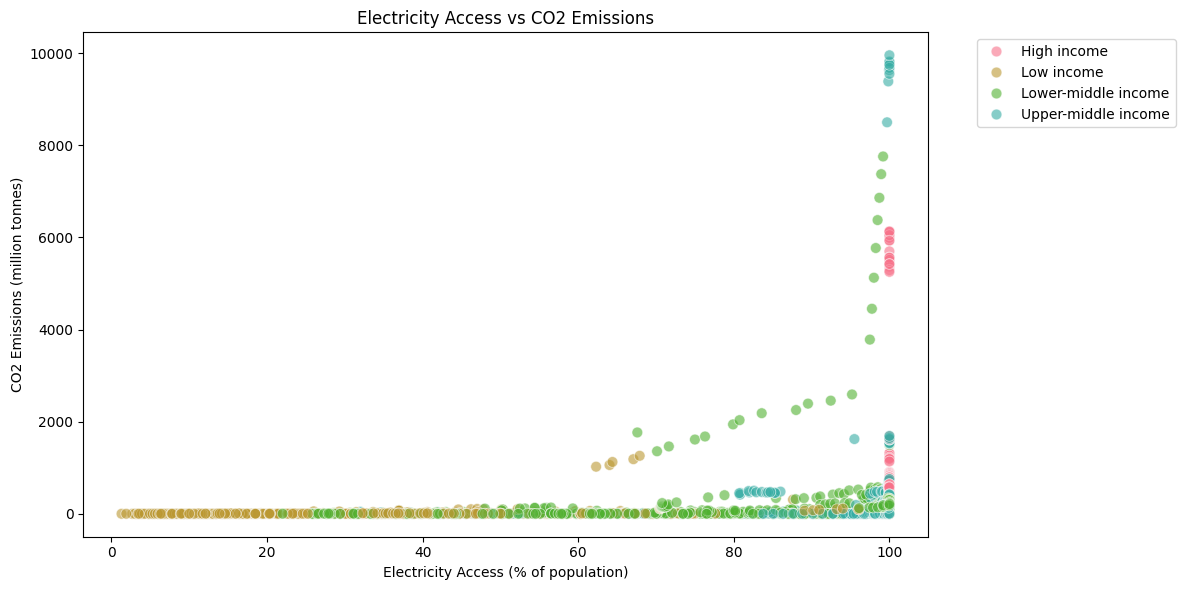

In [ ]:
# 3 - Electricity Access vs CO2 Emissions - Plot 3
plt.figure(figsize=(12, 6))
sns.scatterplot(data=analysis_data, x='Electricity_Access', y='CO2_Emissions',
                hue='Income_Group', alpha=0.6, s=60)
plt.title('Electricity Access vs CO2 Emissions')
plt.xlabel('Electricity Access (% of population)')
plt.ylabel('CO2 Emissions (million tonnes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Countries with near-universal electricity access show varied CO2 emissions. This suggests other factors also contribute to CO2 emission levels.





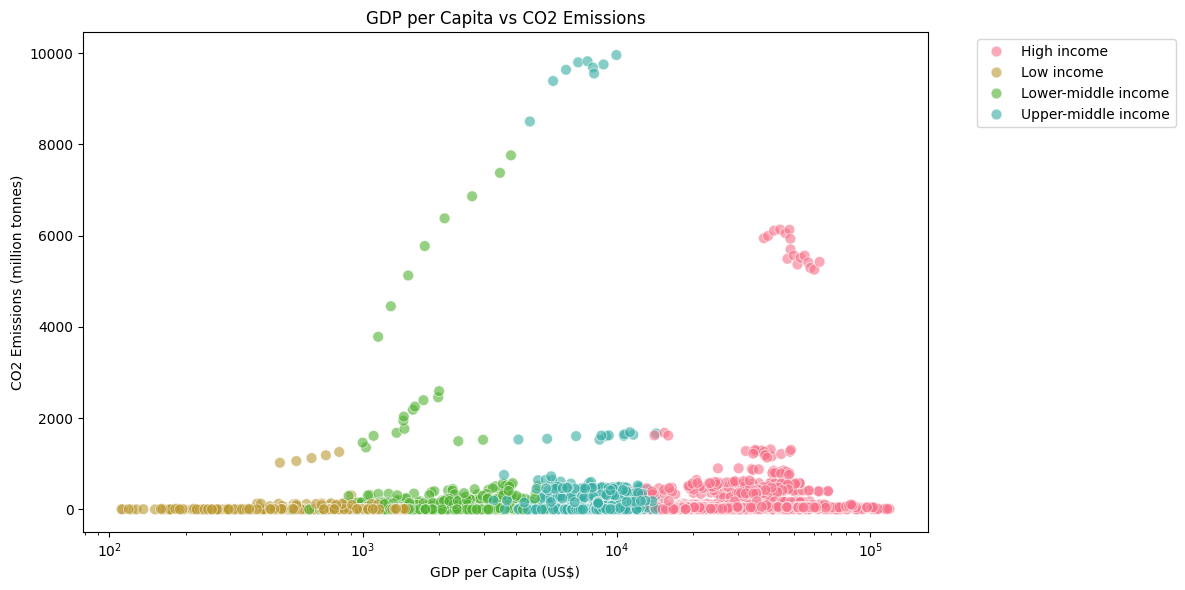

In [ ]:
# 4 - GDP per capita vs CO2 Emissions - Plot 4
plt.figure(figsize=(12, 6))
sns.scatterplot(data=analysis_data, x='GDP_per_capita', y='CO2_Emissions',
                hue='Income_Group', alpha=0.6, s=60)
plt.title('GDP per Capita vs CO2 Emissions')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('CO2 Emissions (million tonnes)')
plt.xscale('log')  # Use log scale for better visualization
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Higher GDP per capita is generally associated with higher CO2 emissions, but the relationship is not linear.

EXPLORATORY DATA ANALYSIS


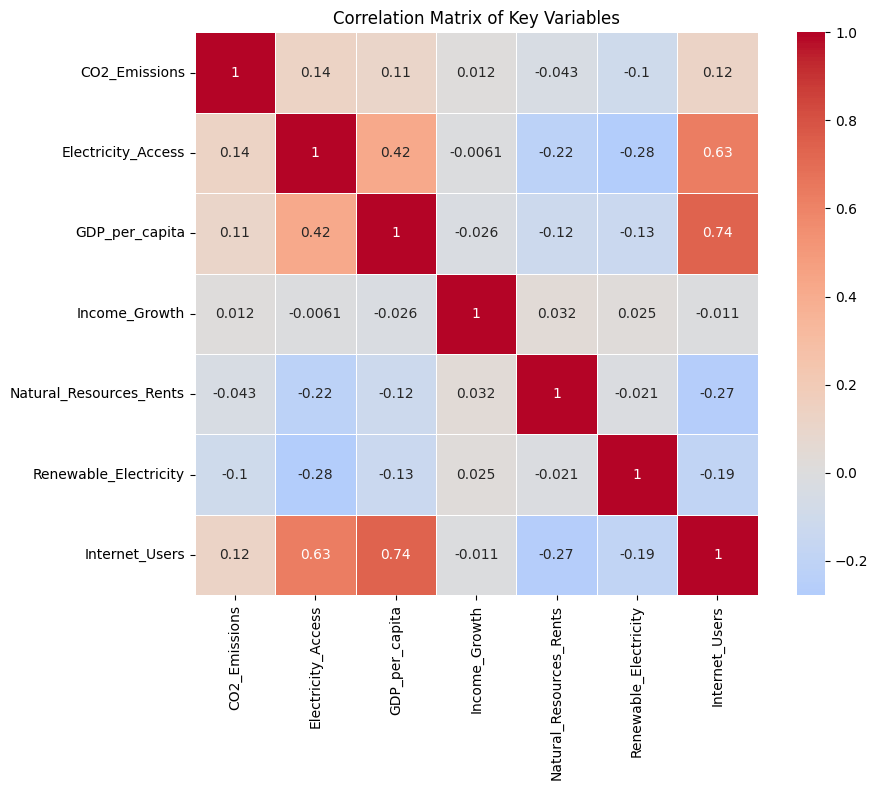

In [ ]:
# Correlation heatmap for numeric variables
numeric_vars = ['CO2_Emissions', 'Electricity_Access', 'GDP_per_capita',
                'Income_Growth', 'Natural_Resources_Rents', 'Renewable_Electricity', 'Internet_Users']

plt.figure(figsize=(10, 8))
correlation_matrix = analysis_data[numeric_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()


We understand the following from the correlation matrix:
1) GDP per capita has the strongest positive correlation with CO2 emissions
2) Electricity access also correlates positively with CO2 emissions
3) Renewable electricity shows a weak negative correlation with CO2 emissions

In [ ]:
# High-income vs low-income countries comparison
high_income = analysis_data[analysis_data['Income_Classification'] == 'High income']
low_income = analysis_data[analysis_data['Income_Classification'] == 'Low income']

print("Comparing High-Income vs Low-Income Countries")
print("_"*70)

comparison_stats = pd.DataFrame({
    'High_Income': high_income[['CO2_Emissions', 'Electricity_Access', 'GDP_per_capita',
                               'Renewable_Electricity', 'Internet_Users']].mean(),
    'Low_Income': low_income[['CO2_Emissions', 'Electricity_Access', 'GDP_per_capita',
                             'Renewable_Electricity', 'Internet_Users']].mean(),
    'Ratio_High_Low': high_income[['CO2_Emissions', 'Electricity_Access', 'GDP_per_capita',
                                  'Renewable_Electricity', 'Internet_Users']].mean() /
                 low_income[['CO2_Emissions', 'Electricity_Access', 'GDP_per_capita',
                            'Renewable_Electricity', 'Internet_Users']].mean()
})

print(comparison_stats.round(2))

Comparing High-Income vs Low-Income Countries
______________________________________________________________________
                       High_Income  Low_Income  Ratio_High_Low
CO2_Emissions               278.63       19.00           14.66
Electricity_Access           99.65       34.54            2.88
GDP_per_capita            36333.30      771.19           47.11
Renewable_Electricity        20.34       47.25            0.43
Internet_Users               67.29        4.60           14.63


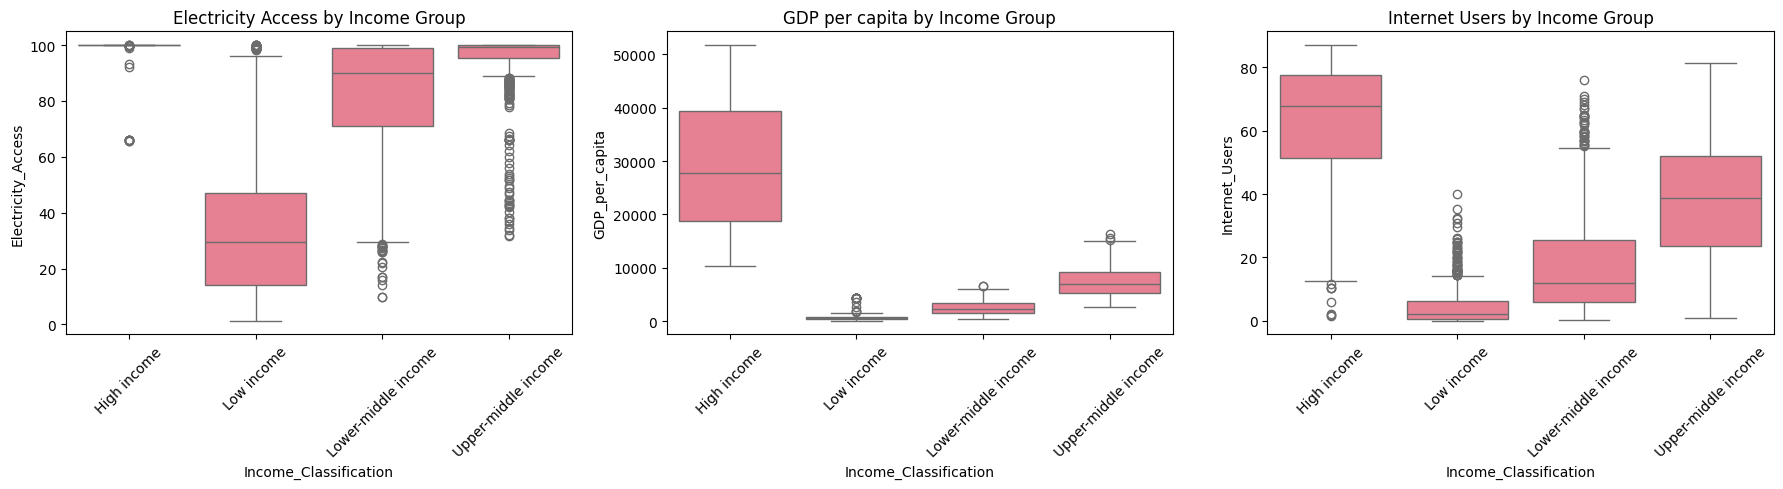

In [ ]:
# 5 - EV Readiness Indicators by Income Group - Plot 5
ev_indicators = ['Electricity_Access', 'GDP_per_capita', 'Internet_Users']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, indicator in enumerate(ev_indicators):
    # Filter out extreme outliers for better visualization
    data_to_plot = analysis_data[analysis_data[indicator] <= analysis_data[indicator].quantile(0.95)]

    sns.boxplot(data=data_to_plot, x='Income_Classification', y=indicator, ax=axes[i])
    axes[i].set_title(f'{indicator.replace("_", " ")} by Income Group')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


High-income countries have better EV readiness infrastructure (electricity, wealth, digital connectivity).

Analyzing EV Readiness Potential in Low-Income and Lower-Middle-Income Countries

In [ ]:
# Focus on low and lower-middle income countries
low_income_countries = analysis_data[analysis_data['Income_Classification'].isin(['Low income', 'Lower-middle income'])]

# Get the most recent year for each country (2018 where available, otherwise latest available)
recent_low_income = low_income_countries.sort_values('Year', ascending=False).groupby('Country').first().reset_index()

print(f"Number of low and lower-middle income countries to be analysed: {recent_low_income.shape[0]}")
print("\nIncome classification distribution:")
print(recent_low_income['Income_Classification'].value_counts())

Number of low and lower-middle income countries to be analysed: 107

Income classification distribution:
Income_Classification
Lower-middle income    79
Low income             28
Name: count, dtype: int64


In [ ]:
# Comprehensive EV readiness potential score for low-income countries
# There are multiple factors that contribute to / indicate the readiness for EV adoption

def calculate_ev_potential_score(row):
    """
    Calculate EV readiness potential score (0-100) for low-income countries
    Higher score means better potential for EV adoption
    """
    scores = []

    # Electricity Access (30% weight)
    elec_score = min(row['Electricity_Access'], 100)  # Cap at 100
    scores.append(elec_score * 0.3)

    # GDP per capita for Economic Capacity (25% weight)
    gdp_score = min(np.log1p(row['GDP_per_capita']) / np.log1p(5000) * 100, 100)
    scores.append(gdp_score * 0.25)

    # Interet Users for Digital Infrastructure (20% weight)
    internet_score = min(row['Internet_Users'], 100)
    scores.append(internet_score * 0.2)

    # Renewable Electricity for Clean Energy Foundation (15% weight)
    renewable_score = min(row['Renewable_Electricity'], 100)
    scores.append(renewable_score * 0.15)

    # Income Growth for Economic Growth Momentum (10% weight)
    growth_score = min(max(row['Income_Growth'] * 10 + 50, 0), 100)  # Converting to 0-100 scale
    scores.append(growth_score * 0.1)

    return sum(scores)

# Scores for each country
recent_low_income['EV_Potential_Score'] = recent_low_income.apply(calculate_ev_potential_score, axis=1)

# Improvement needed (gap between current and target)
recent_low_income['Improvement_Needed'] = 100 - recent_low_income['EV_Potential_Score']

print("EV Potential Score Distribution:")
print(recent_low_income['EV_Potential_Score'].describe())

EV Potential Score Distribution:
count    107.000000
mean      63.125119
std       12.853947
min       32.588713
25%       54.913211
50%       65.497813
75%       73.239743
max       89.650245
Name: EV_Potential_Score, dtype: float64


In [ ]:
# Identify the top potential countries
top_potential = recent_low_income.nlargest(15, 'EV_Potential_Score')[
    ['Country', 'Income_Classification', 'EV_Potential_Score',
     'Electricity_Access', 'GDP_per_capita', 'Internet_Users',
     'Renewable_Electricity', 'Income_Growth', 'CO2_Emissions']
].round(2)

print("TOP 15 LOW-INCOME COUNTRIES WITH HIGHEST EV READINESS POTENTIAL")
print()
print(top_potential.to_string(index=False))

TOP 15 LOW-INCOME COUNTRIES WITH HIGHEST EV READINESS POTENTIAL

        Country Income_Classification  EV_Potential_Score  Electricity_Access  GDP_per_capita  Internet_Users  Renewable_Electricity  Income_Growth  CO2_Emissions
        Georgia   Lower-middle income               89.65               99.90         4722.79           62.72                  82.03           7.51           9.86
       Paraguay   Lower-middle income               87.08               99.02         5936.98           36.90                 100.00           8.85           5.17
        Albania   Lower-middle income               84.42              100.00         4437.14           47.00                  98.59           0.58           5.03
        Vietnam   Lower-middle income               82.86              100.00         2566.45           69.85                  39.01           7.58         211.77
        Armenia   Lower-middle income               80.68               99.90         4220.54           68.25           

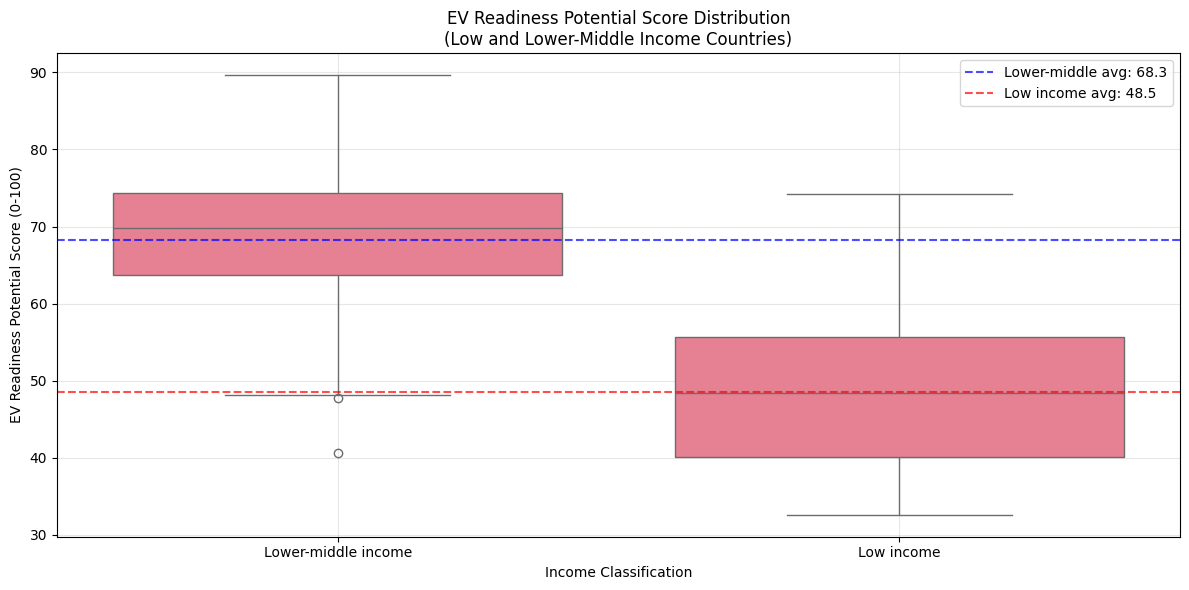

Average EV Potential Scores -
- Lower-middle income countries: 68.3
- Low income countries: 48.5
- Gap: 19.8 points


In [ ]:
# EV Potential Score Distribution by Income Classification
plt.figure(figsize=(12, 6))

# Boxplot - EV potential scores by income classification
sns.boxplot(data=recent_low_income, x='Income_Classification', y='EV_Potential_Score')
plt.title('EV Readiness Potential Score Distribution\n(Low and Lower-Middle Income Countries)')
plt.ylabel('EV Readiness Potential Score (0-100)')
plt.xlabel('Income Classification')
plt.grid(True, alpha=0.3)

# Add averages
lower_middle_avg = recent_low_income[recent_low_income['Income_Classification'] == 'Lower-middle income']['EV_Potential_Score'].mean()
low_avg = recent_low_income[recent_low_income['Income_Classification'] == 'Low income']['EV_Potential_Score'].mean()

plt.axhline(y=lower_middle_avg, color='blue', linestyle='--', alpha=0.7, label=f'Lower-middle avg: {lower_middle_avg:.1f}')
plt.axhline(y=low_avg, color='red', linestyle='--', alpha=0.7, label=f'Low income avg: {low_avg:.1f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Average EV Potential Scores -")
print(f"- Lower-middle income countries: {lower_middle_avg:.1f}")
print(f"- Low income countries: {low_avg:.1f}")
print(f"- Gap: {lower_middle_avg - low_avg:.1f} points")

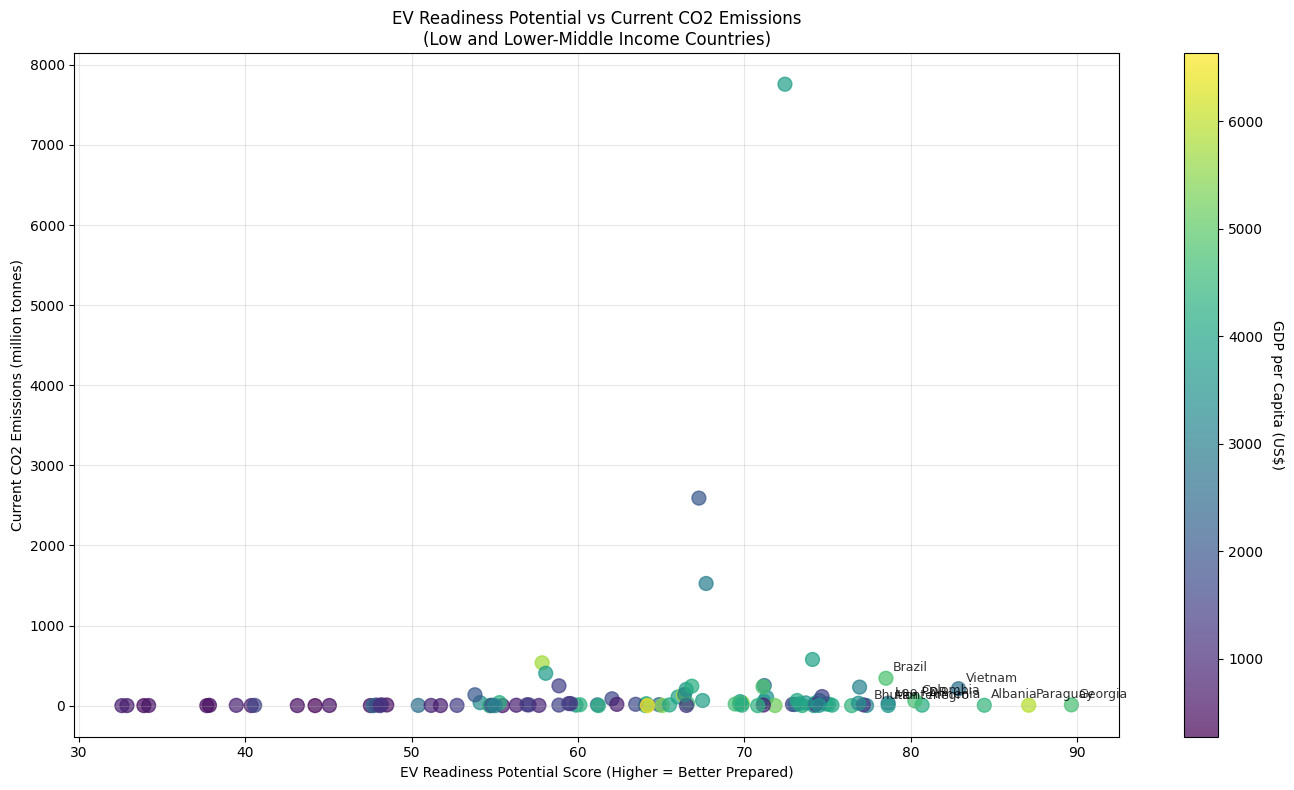

In [ ]:
# 9 - EV Potential vs Current CO2 Emissions - Plot 9
plt.figure(figsize=(14, 8))

# Create scatter plot
scatter = plt.scatter(recent_low_income['EV_Potential_Score'],
                     recent_low_income['CO2_Emissions'],
                     c=recent_low_income['GDP_per_capita'],
                     cmap='viridis', s=100, alpha=0.7)

# Display top 10 countries with highest EV potential
top_10 = recent_low_income.nlargest(10, 'EV_Potential_Score')
for i, row in top_10.iterrows():
    plt.annotate(row['Country'],
                (row['EV_Potential_Score'], row['CO2_Emissions']),
                textcoords="offset points",
                xytext=(5,5),
                ha='left',
                fontsize=9,
                alpha=0.8)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('GDP per Capita (US$)', rotation=270, labelpad=15)

plt.xlabel('EV Readiness Potential Score (Higher = Better Prepared)')
plt.ylabel('Current CO2 Emissions (million tonnes)')
plt.title('EV Readiness Potential vs Current CO2 Emissions\n(Low and Lower-Middle Income Countries)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

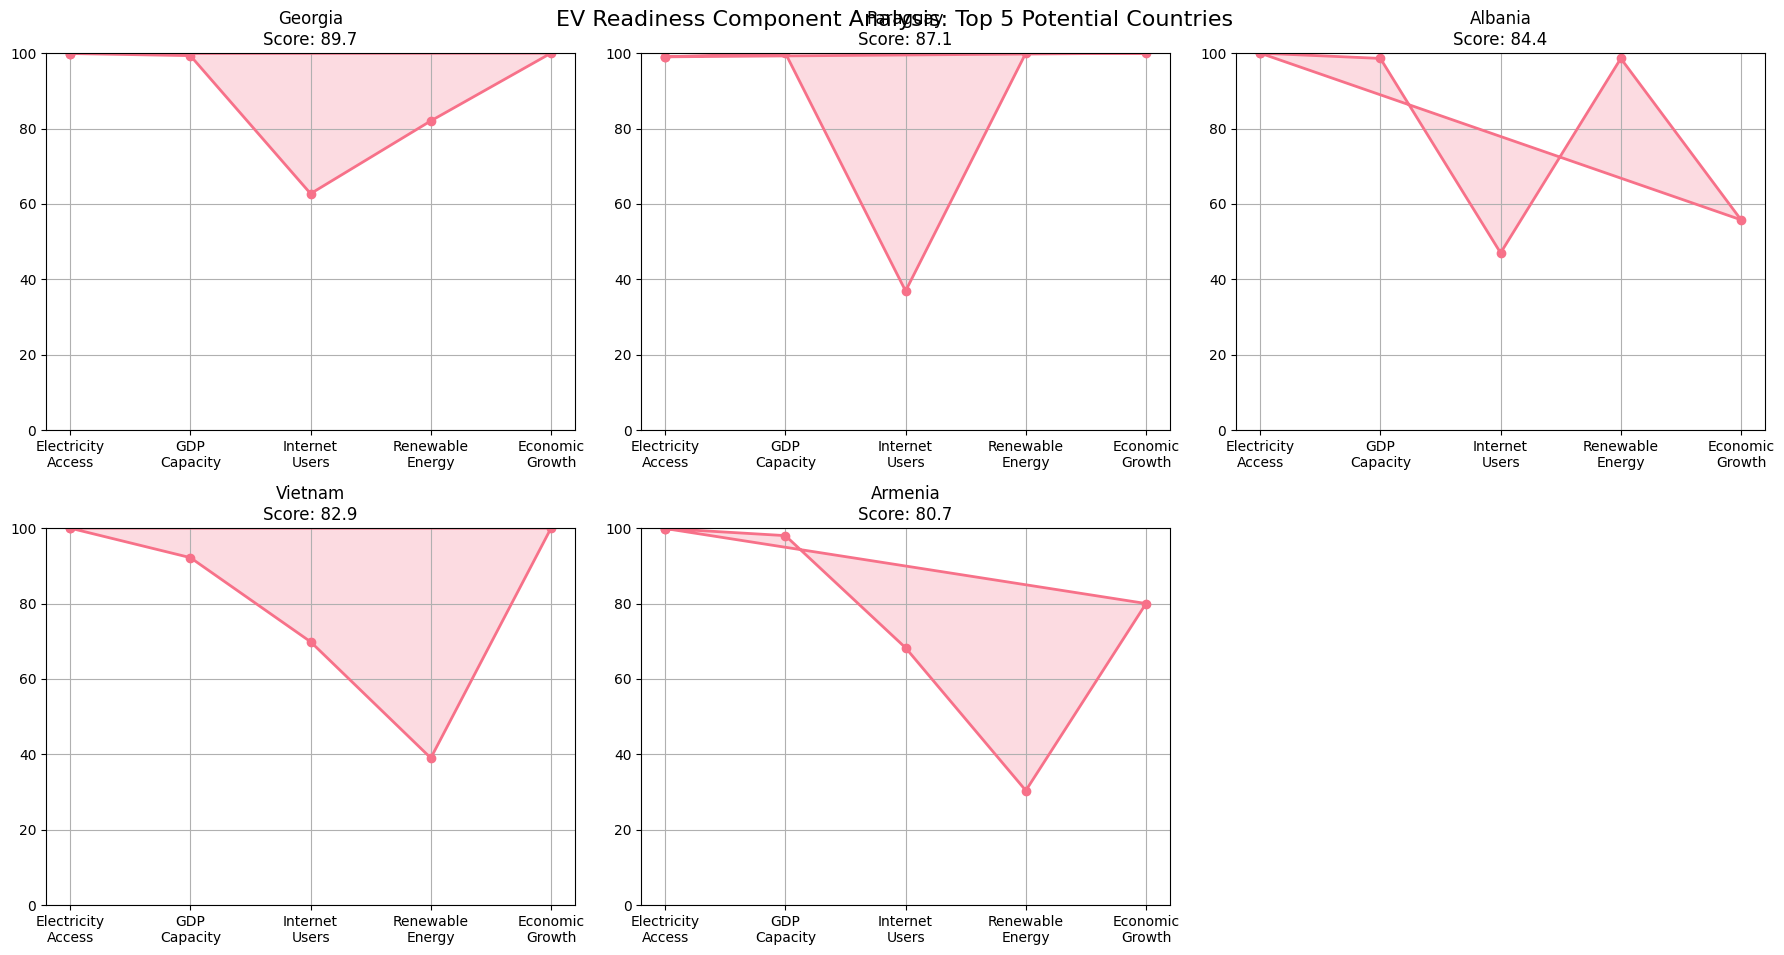

In [ ]:
# 10 - Component Analysis of Top Potential Countries - Plot 10
top_5_potential = recent_low_income.nlargest(5, 'EV_Potential_Score')

# Prepare data
categories = ['Electricity\nAccess', 'GDP\nCapacity', 'Internet\nUsers',
             'Renewable\nEnergy', 'Economic\nGrowth']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (idx, country) in enumerate(top_5_potential.iterrows()):
    if i < len(axes):
        values = [
            country['Electricity_Access'],
            min(np.log1p(country['GDP_per_capita']) / np.log1p(5000) * 100, 100),
            country['Internet_Users'],
            country['Renewable_Electricity'],
            min(max(country['Income_Growth'] * 10 + 50, 0), 100)
        ]

        # Create radar chart
        angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
        values += values[:1]  # Complete the circle
        angles += angles[:1]

        ax = axes[i]
        ax.plot(angles, values, 'o-', linewidth=2, label=country['Country'])
        ax.fill(angles, values, alpha=0.25)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        ax.set_ylim(0, 100)
        ax.set_title(f"{country['Country']}\nScore: {country['EV_Potential_Score']:.1f}")
        ax.grid(True)

# Remove empty subplots
for i in range(len(top_5_potential), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('EV Readiness Component Analysis: Top 5 Potential Countries', fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

In [ ]:
# Identifying quick wins, medium-term opportunities, and long-term investments
recent_low_income['Investment_Type'] = 'Long-term Development'
recent_low_income.loc[recent_low_income['EV_Potential_Score'] >= 50, 'Investment_Type'] = 'Medium-term Opportunity'
recent_low_income.loc[recent_low_income['EV_Potential_Score'] >= 70, 'Investment_Type'] = 'Quick Win'

investment_summary = recent_low_income.groupby('Investment_Type').agg({
    'Country': 'count',
    'EV_Potential_Score': 'mean',
    'Electricity_Access': 'mean',
    'GDP_per_capita': 'mean',
    'CO2_Emissions': 'mean'
}).round(2)

print("INVESTMENT PRIORITY CATEGORIES")
print()
print(investment_summary)

print("\nCOUNTRIES IN ORDER OF INVESTMENT PRIORITY:")
for category in ['Quick Win', 'Medium-term Opportunity', 'Long-term Development']:
    countries = recent_low_income[recent_low_income['Investment_Type'] == category]['Country'].tolist()
    print(f"\n{category} ({len(countries)} countries):")
    print(", ".join(countries[:10]) + ("..." if len(countries) > 10 else ""))

INVESTMENT PRIORITY CATEGORIES

                         Country  EV_Potential_Score  Electricity_Access  \
Investment_Type                                                            
Long-term Development         18               41.65               31.31   
Medium-term Opportunity       51               61.23               75.30   
Quick Win                     38               75.83               96.91   

                         GDP_per_capita  CO2_Emissions  
Investment_Type                                         
Long-term Development            829.23           2.87  
Medium-term Opportunity         2993.53         134.94  
Quick Win                       3546.32         272.77  

COUNTRIES IN ORDER OF INVESTMENT PRIORITY:

Quick Win (38 countries):
Albania, Armenia, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Cabo Verde, Cambodia, China...

Medium-term Opportunity (51 countries):
Algeria, Angola, Azerbaijan, Bangladesh, Belarus, Bulgaria, Cameroon, Comoros, Congo

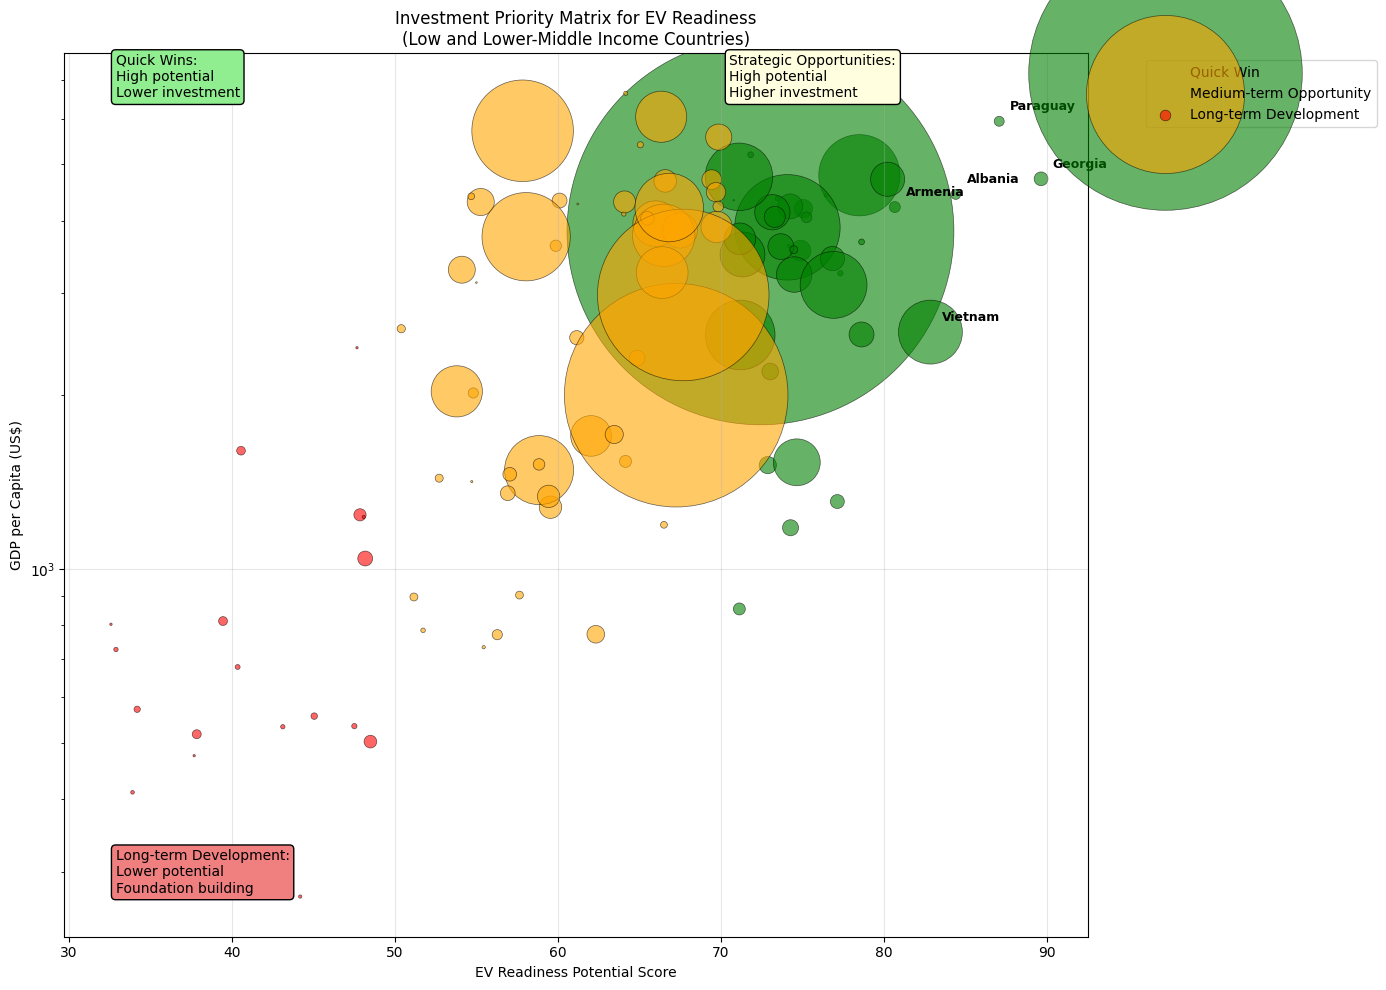

In [ ]:
# 11 - Investment Priority Matrix - Plot 11
plt.figure(figsize=(14, 10))

# Create scatter plot colored by investment type
colors = {'Quick Win': 'green', 'Medium-term Opportunity': 'orange', 'Long-term Development': 'red'}
size = recent_low_income['CO2_Emissions'] * 10  # Size by CO2 emissions

for category, color in colors.items():
    data = recent_low_income[recent_low_income['Investment_Type'] == category]
    plt.scatter(data['EV_Potential_Score'], data['GDP_per_capita'],
               c=color, label=category, s=size[data.index], alpha=0.6, edgecolors='black', linewidth=0.5)

# Add country labels for top potential countries
for i, row in top_5_potential.iterrows():
    plt.annotate(row['Country'],
                (row['EV_Potential_Score'], row['GDP_per_capita']),
                textcoords="offset points",
                xytext=(8,8),
                ha='left',
                fontsize=9,
                weight='bold')

plt.xlabel('EV Readiness Potential Score')
plt.ylabel('GDP per Capita (US$)')
plt.yscale('log')  # Log scale for better visualization
plt.title('Investment Priority Matrix for EV Readiness\n(Low and Lower-Middle Income Countries)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Add quadrant descriptions
plt.text(0.05, 0.95, 'Quick Wins:\nHigh potential\nLower investment',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='lightgreen'))
plt.text(0.65, 0.95, 'Strategic Opportunities:\nHigh potential\nHigher investment',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='lightyellow'))
plt.text(0.05, 0.05, 'Long-term Development:\nLower potential\nFoundation building',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='lightcoral'))

plt.tight_layout()
plt.show()

PREDICTIVE ANALYTICS


Linear Regression


We aim to use 2002-2017 data to predict 2018 CO2 emissions.

In [ ]:
# Prepare data for predictive modeling

# Separate training data for 2002-2017 and test data for 2018
train_data = analysis_data[analysis_data['Year'] <= 2017].copy()
test_data = analysis_data[analysis_data['Year'] == 2018].copy()

print(f"Training data: {train_data.shape[0]} records (2002-2017)")
print(f"Test data: {test_data.shape[0]} records (2018)")

# Select features for the model using variables representing EV readiness and economic factors
feature_columns = [
    'Electricity_Access',
    'GDP_per_capita',
    'Income_Growth',
    'Natural_Resources_Rents',
    'Renewable_Electricity',
    'Internet_Users'
]

# Prepare X and y for training
X_train = train_data[feature_columns]
y_train = train_data['CO2_Emissions']

X_test = test_data[feature_columns]
y_test = test_data['CO2_Emissions']

print(f"Training features: {X_train.shape}")
print(f"Test features: {X_test.shape}")

# Handle any remaining missing values
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())  # Use training median to avoid data leakage

Training data: 2768 records (2002-2017)
Test data: 173 records (2018)
Training features: (2768, 6)
Test features: (173, 6)


In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MODEL PERFORMANCE:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Show feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFEATURE IMPORTANCE (Absolute Coefficients):")
print(feature_importance)

MODEL PERFORMANCE:
Root Mean Squared Error: 881.93
R-squared Score: 0.02

FEATURE IMPORTANCE (Absolute Coefficients):
                   Feature  Coefficient
0       Electricity_Access     2.151243
4    Renewable_Electricity    -1.675604
3  Natural_Resources_Rents    -1.242067
2            Income_Growth     0.687998
5           Internet_Users     0.194168
1           GDP_per_capita     0.002305


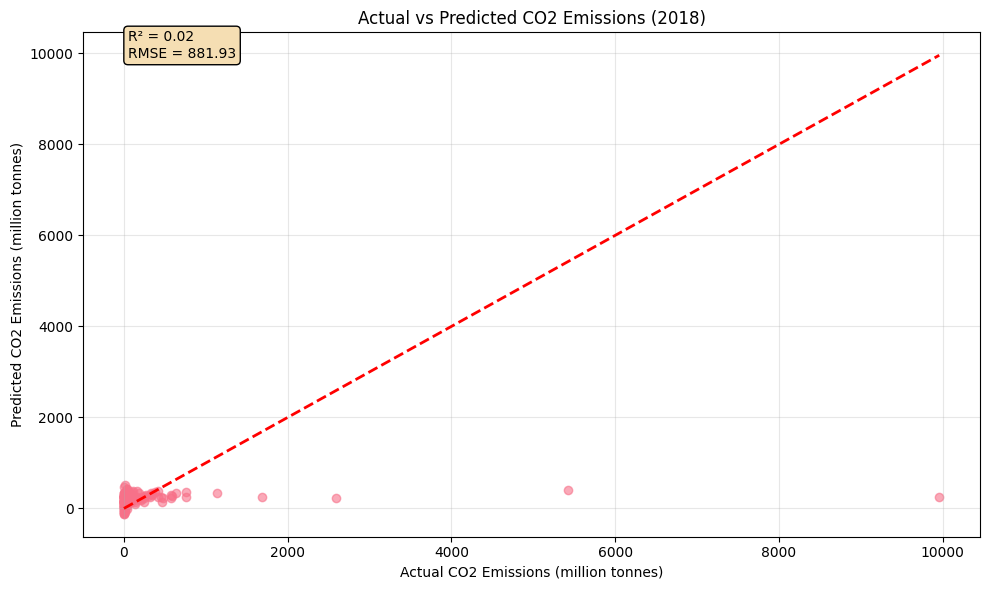

In [ ]:
# 12 - Actual vs Predicted CO2 Emissions - Plot 12
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CO2 Emissions (million tonnes)')
plt.ylabel('Predicted CO2 Emissions (million tonnes)')
plt.title('Actual vs Predicted CO2 Emissions (2018)')
plt.grid(True, alpha=0.3)

# Add statistics to the plot
plt.text(0.05, 0.95, f'R² = {r2:.2f}\nRMSE = {rmse:.2f}',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

plt.tight_layout()
plt.show()

Multivariable Linear Regression

In [ ]:
# Data Preparation for Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Prepare the data for regression analysis
regression_data = analysis_data.copy()

# Select features and target variable
feature_columns = [
    'Electricity_Access',
    'GDP_per_capita',
    'Income_Growth',
    'Natural_Resources_Rents',
    'Renewable_Electricity',
    'Internet_Users'
]

target_column = 'CO2_Emissions'

# Create training (2002-2016) and testing (2017-2018) sets
train_data = regression_data[regression_data['Year'] <= 2016].copy()
test_data = regression_data[regression_data['Year'] >= 2017].copy()

print(f"Training data: {train_data.shape[0]} records (2002-2016)")
print(f"Test data: {test_data.shape[0]} records (2017-2018)")

# Prepare X and y
X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Handle remaining missing values
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())  # Use training median to avoid data leakage

print(f"\nFeatures used: {feature_columns}")
print(f"Target variable: {target_column}")

Training data: 2595 records (2002-2016)
Test data: 346 records (2017-2018)

Features used: ['Electricity_Access', 'GDP_per_capita', 'Income_Growth', 'Natural_Resources_Rents', 'Renewable_Electricity', 'Internet_Users']
Target variable: CO2_Emissions


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print("Feature scaling completed:")
print()
print("Mean of scaled features:", X_train_scaled_df.mean().round(2))
print()
print("Std of scaled features:", X_train_scaled_df.std().round(2))

Feature scaling completed:

Mean of scaled features: Electricity_Access         0.0
GDP_per_capita            -0.0
Income_Growth             -0.0
Natural_Resources_Rents    0.0
Renewable_Electricity      0.0
Internet_Users             0.0
dtype: float64

Std of scaled features: Electricity_Access         1.0
GDP_per_capita             1.0
Income_Growth              1.0
Natural_Resources_Rents    1.0
Renewable_Electricity      1.0
Internet_Users             1.0
dtype: float64


In [ ]:
# Implement Multivariable Linear Regression
print("MULTIVARIABLE LINEAR REGRESSION ANALYSIS")
print()

# Create and train the model
mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled_df, y_train)

# Make predictions
y_pred_train = mlr_model.predict(X_train_scaled_df)
y_pred_test = mlr_model.predict(X_test_scaled_df)

# Calculate performance metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("MODEL PERFORMANCE METRICS:")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.2f} million tonnes")
print(f"Test RMSE: {test_rmse:.2f} million tonnes")
print(f"Training MAE: {train_mae:.2f} million tonnes")
print(f"Test MAE: {test_mae:.2f} million tonnes")

MULTIVARIABLE LINEAR REGRESSION ANALYSIS

MODEL PERFORMANCE METRICS:
Training R²: 0.0272
Test R²: 0.0211
Training RMSE: 752.92 million tonnes
Test RMSE: 871.57 million tonnes
Training MAE: 244.28 million tonnes
Test MAE: 275.00 million tonnes


In [ ]:
# Coefficient Analysis
print("\nREGRESSION COEFFICIENTS ANALYSIS:")
print()

coefficients = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': mlr_model.coef_,
    'Absolute_Effect': np.abs(mlr_model.coef_)
}).sort_values('Absolute_Effect', ascending=False)

# Interpretation
def interpret_coefficient(feature, coef):
    if coef > 0:
        return f"1 std increase → {coef:.2f} million tonnes CO2 increase"
    else:
        return f"1 std increase → {abs(coef):.2f} million tonnes CO2 decrease"

coefficients['Interpretation'] = coefficients.apply(
    lambda x: interpret_coefficient(x['Feature'], x['Coefficient']), axis=1
)

print(coefficients.to_string(index=False))

print(f"\nIntercept: {mlr_model.intercept_:.2f}")
print("Interpretation: Expected CO2 emissions for a country with average levels of the features (when all features are at their mean values)")


REGRESSION COEFFICIENTS ANALYSIS:

                Feature  Coefficient  Absolute_Effect                                     Interpretation
     Electricity_Access    63.873591        63.873591 1 std increase → 63.87 million tonnes CO2 increase
  Renewable_Electricity   -55.518567        55.518567 1 std increase → 55.52 million tonnes CO2 decrease
         GDP_per_capita    39.480088        39.480088 1 std increase → 39.48 million tonnes CO2 increase
Natural_Resources_Rents   -12.799135        12.799135 1 std increase → 12.80 million tonnes CO2 decrease
          Income_Growth    11.479403        11.479403 1 std increase → 11.48 million tonnes CO2 increase
         Internet_Users    10.314251        10.314251 1 std increase → 10.31 million tonnes CO2 increase

Intercept: 176.05
Interpretation: Expected CO2 emissions for a country with average levels of the features (when all features are at their mean values)


In [ ]:
# Statistical Significance Analysis
print("\nSTATISTICAL SIGNIFICANCE ANALYSIS:")
print()

# Add constant for statsmodels (intercept)
X_train_sm = sm.add_constant(X_train_scaled_df)

# Fit OLS model
sm_model = sm.OLS(y_train, X_train_sm).fit()

# Print detailed summary
print(sm_model.summary())

# Extract p-values for interpretation
p_values = sm_model.pvalues[1:]  # Skip intercept
significant_features = p_values[p_values < 0.05]
non_significant_features = p_values[p_values >= 0.05]

print(f"\nStatistically Significant Features (p < 0.05): {len(significant_features)}")
for feature, p_val in significant_features.items():
    print(f"   {feature}: p = {p_val:.4f}")

if len(non_significant_features) > 0:
    print(f"\nNon-Significant Features (p ≥ 0.05): {len(non_significant_features)}")
    for feature, p_val in non_significant_features.items():
        print(f"   {feature}: p = {p_val:.4f}")


STATISTICAL SIGNIFICANCE ANALYSIS:

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     12.08
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           1.97e-13
Time:                        23:37:16   Log-Likelihood:                -20871.
No. Observations:                2595   AIC:                         4.176e+04
Df Residuals:                    2588   BIC:                         4.180e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [ ]:
# Country-Specific Predictions Analysis
test_predictions = test_data.copy()
test_predictions['Predicted_CO2'] = y_pred_test
test_predictions['Prediction_Error'] = y_pred_test - y_test
test_predictions['Error_Percentage'] = (test_predictions['Prediction_Error'] / test_predictions['CO2_Emissions']) * 100

# Analyze best and worst predictions
print("PREDICTION ACCURACY ANALYSIS BY COUNTRY:")
print()

# Best predictions (<=10% error)
accurate_predictions = test_predictions[test_predictions['Error_Percentage'].abs() <= 10]
print(f"\nHighly Accurate Predictions (within 10% error): {accurate_predictions.shape[0]} countries")
print("5 most accurate predictions:")
print(accurate_predictions.nsmallest(5, 'Error_Percentage')[['Country', 'CO2_Emissions', 'Predicted_CO2', 'Error_Percentage']].round(2))

# Worst predictions (>50% error)
inaccurate_predictions = test_predictions[test_predictions['Error_Percentage'].abs() > 50]
print(f"\nLess Accurate Predictions (>50% error): {inaccurate_predictions.shape[0]} countries")
if not inaccurate_predictions.empty:
    print("5 least accurate predictions:")
    print(inaccurate_predictions.nlargest(5, 'Error_Percentage')[['Country', 'CO2_Emissions', 'Predicted_CO2', 'Error_Percentage']].round(2))

PREDICTION ACCURACY ANALYSIS BY COUNTRY:


Highly Accurate Predictions (within 10% error): 16 countries
5 most accurate predictions:
             Country  CO2_Emissions  Predicted_CO2  Error_Percentage
1519           Italy         348.08         313.52             -9.93
151        Australia         415.95         376.98             -9.37
2925        Thailand         292.45         266.09             -9.01
1119  United Kingdom         388.09         354.94             -8.54
1462            Iraq         211.27         193.99             -8.18

Less Accurate Predictions (>50% error): 296 countries
5 least accurate predictions:
       Country  CO2_Emissions  Predicted_CO2  Error_Percentage
2981     Tonga           0.16         265.09         167675.68
2982     Tonga           0.16         255.90         154988.03
853   Dominica           0.16         246.51         153009.01
854   Dominica           0.17         237.41         142915.25
3228   Vanuatu           0.14         164.77         

LSTM - Predictions for 2018 using data from 2002-2017

Identifying EV Adoption Opportunities

In [ ]:
# Identify countries where EV adoption would have the biggest impact
# Consider countries with high CO2 emissions but good EV readiness

impact_analysis = test_data.copy()
# Filter impact_analysis to only include 2018 data to match the length of y_pred
impact_analysis = impact_analysis[impact_analysis['Year'] == 2018].copy()

# Assign predictions to the filtered data
impact_analysis['Predicted_CO2'] = y_pred
impact_analysis['Prediction_Error'] = y_pred - impact_analysis['CO2_Emissions']

# Create an EV readiness score (simple average of key indicators)
impact_analysis['EV_Readiness_Score'] = (
    impact_analysis['Electricity_Access'] / 100 +  # Normalize to 0-1
    np.log1p(impact_analysis['GDP_per_capita']) / np.log1p(impact_analysis['GDP_per_capita']).max() +
    impact_analysis['Internet_Users'] / 100  # Normalize to 0-1
) / 3

# Identify high-impact opportunities
high_impact = impact_analysis[
    (impact_analysis['CO2_Emissions'] > impact_analysis['CO2_Emissions'].median()) &
    (impact_analysis['EV_Readiness_Score'] > impact_analysis['EV_Readiness_Score'].median())
].sort_values('CO2_Emissions', ascending=False)

print("HIGH-IMPACT CONTRIES FOR EV ADOPTION\n")
print("High-impact countries with both high CO2 emissions and good EV readiness infrastructure:\n")
print(high_impact[['Country', 'CO2_Emissions', 'EV_Readiness_Score', 'Income_Classification']].head(10))

HIGH-IMPACT CONTRIES FOR EV ADOPTION

High-impact countries with both high CO2 emissions and good EV readiness infrastructure:

                 Country  CO2_Emissions  EV_Readiness_Score  \
607                China       9956.569            0.793759   
3134       United States       5424.882            0.944104   
2583  Russian Federation       1691.360            0.869502   
1576               Japan       1135.688            0.939759   
1443  Iran, Islamic Rep.        755.402            0.801297   
835              Germany        755.362            0.931306   
1671         Korea, Rep.        634.934            0.951043   
550               Canada        586.505            0.955841   
2621        Saudi Arabia        576.758            0.931738   
436               Brazil        466.649            0.827740   

     Income_Classification  
607    Upper-middle income  
3134           High income  
2583   Upper-middle income  
1576           High income  
1443   Upper-middle income  
835 

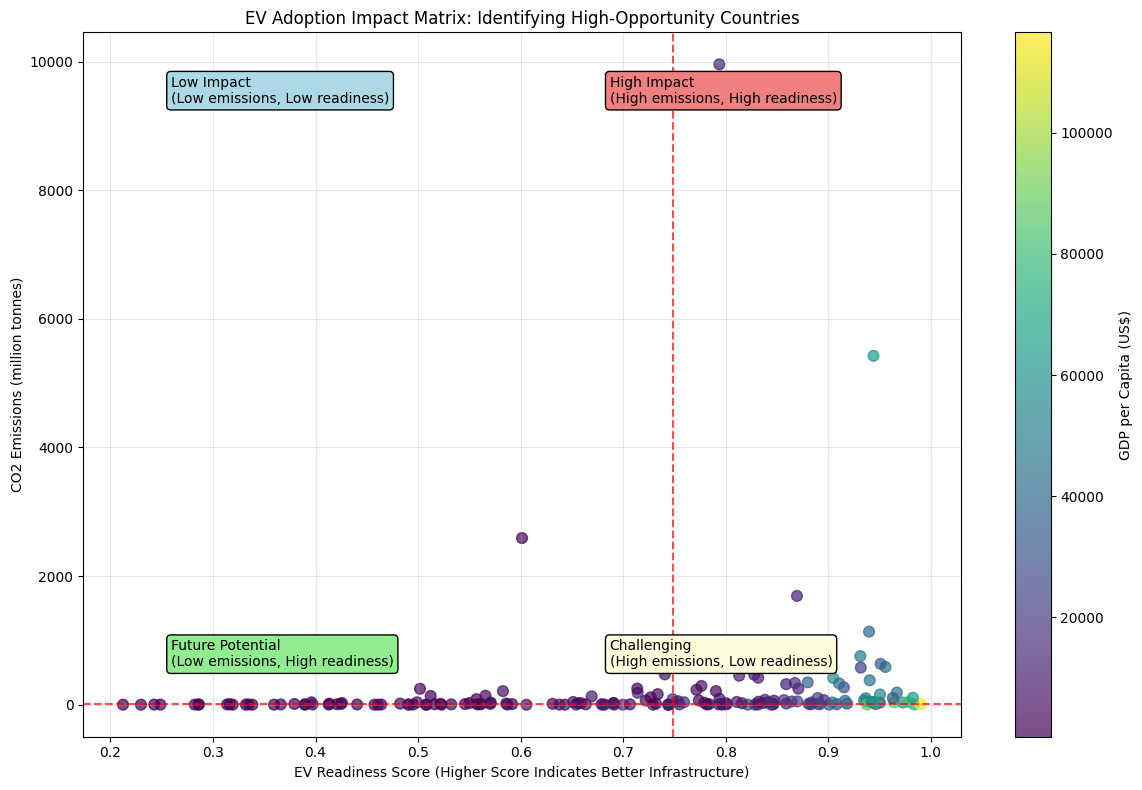

In [ ]:
# EV Adoption Impact Matrix - Plot
plt.figure(figsize=(12, 8))

# Scatter plot with EV readiness vs CO2 emissions
scatter = plt.scatter(impact_analysis['EV_Readiness_Score'],
                     impact_analysis['CO2_Emissions'],
                     c=impact_analysis['GDP_per_capita'],
                     cmap='viridis', s=60, alpha=0.7)

# Add colorbar
plt.colorbar(scatter, label='GDP per Capita (US$)')

# Add quadrant lines
plt.axhline(y=impact_analysis['CO2_Emissions'].median(), color='red', linestyle='--', alpha=0.7)
plt.axvline(x=impact_analysis['EV_Readiness_Score'].median(), color='red', linestyle='--', alpha=0.7)

# Label quadrants
plt.text(0.1, 0.9, 'Low Impact\n(Low emissions, Low readiness)',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='lightblue'))
plt.text(0.6, 0.9, 'High Impact\n(High emissions, High readiness)',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='lightcoral'))
plt.text(0.1, 0.1, 'Future Potential\n(Low emissions, High readiness)',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='lightgreen'))
plt.text(0.6, 0.1, 'Challenging\n(High emissions, Low readiness)',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='lightyellow'))

plt.xlabel('EV Readiness Score (Higher Score Indicates Better Infrastructure)')
plt.ylabel('CO2 Emissions (million tonnes)')
plt.title('EV Adoption Impact Matrix: Identifying High-Opportunity Countries')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Final Conclusions and Recommendations